In [710]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [711]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
import warnings
warnings.filterwarnings('ignore')


In [712]:
train =pd.read_csv('train_label.csv')

In [713]:
train.head() # to check the head of the dataset

,date,label
0,3/5/2015,NaN
1,4/5/2015,0.0
2,5/5/2015,0.0
3,6/5/2015,0.0
4,7/5/2015,0.0


to check the information  of the dataset

In [714]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 2 columns):
date     514 non-null object
label    513 non-null float64
dtypes: float64(1), object(1)
memory usage: 10.6+ KB


In [715]:
train.describe()

,label
count,513.000000
mean,0.048733
std,0.215519
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [716]:
train.isnull().sum() 

date     158
label    159
dtype: int64

In [717]:
train[train['label']==1].count()

date     25
label    25
dtype: int64

In [718]:
train[train['label']==0].count()


date     488
label    488
dtype: int64

In [719]:
from datetime import datetime
data = [go.Scatter(x=train.date, y=train['label'])]

py.iplot(data, filename = 'time-series-simple')

In [720]:
train.fillna(0,inplace=True) #by using fillna we can replace nan with 0

In [721]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 2 columns):
date     672 non-null object
label    672 non-null float64
dtypes: float64(1), object(1)
memory usage: 10.6+ KB


In [722]:
X=train.drop('label',axis=1)
y=train.label

In [723]:
X.shape

(672, 1)

In [724]:
y.shape

(672,)

In [725]:
import datetime as dt
X['date'] = pd.to_datetime(X['date'])
X['date']=X['date'].map(dt.datetime.toordinal)

X['date'].head()  




0    735662
1    735693
2    735723
3    735754
4    735784
Name: date, dtype: int64

** Using train test split function  **

In [726]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=60,test_size=0.20)


In [727]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [728]:
#predict
prediction = decision.predict(X_test)

#probabilities
probs = decision.predict_proba(X_test)[:,1]

#print the predicted values
print(prediction)
print(probs)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


to save the test_set  in cvs file 

In [729]:
output=pd.DataFrame(data={"date":X_test["date"],"probability":probs})
output.to_csv(path_or_buf="results.csv" , index=False, quoting=3 )


In [730]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, prediction)
roc_auc

0.5807692307692307

Check Out the confusion matrix to find out the true positive and true negative 

In [731]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
cm

array([[125,   5],
       [  4,   1]], dtype=int64)

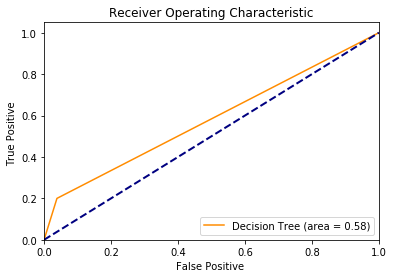

In [732]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
fpr, tpr, thresholds = roc_curve(y_test, decision.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [733]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [734]:
pre=random.predict(X_test)


In [735]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pre)
roc_auc

0.5807692307692307

In [738]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pre)
cm

array([[125,   5],
       [  4,   1]], dtype=int64)

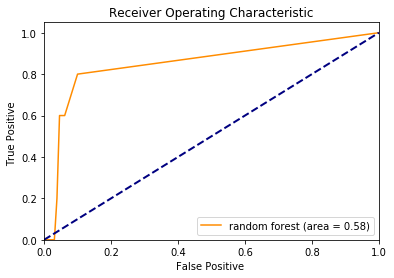

In [739]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
fpr, tpr, thresholds = roc_curve(y_test, random.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='random forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()